# Project 1, Part 5, Data Visualization



# Included Modules and Packages

Code cell containing your includes for modules and packages

In [2]:
import math
import numpy as np
import pandas as pd

import psycopg2

# Supporting code

Code cells containing any supporting code, such as connecting to the database, any functions, etc.  Remember you can use any code from the labs.

In [3]:
#
# function to run a select query and return rows in a pandas dataframe
# pandas puts all numeric values from postgres to float
# if it will fit in an integer, change it to integer
#

def my_select_query_pandas(query, rollback_before_flag, rollback_after_flag):
    "function to run a select query and return rows in a pandas dataframe"
    
    if rollback_before_flag:
        connection.rollback()
    
    df = pd.read_sql_query(query, connection)
    
    if rollback_after_flag:
        connection.rollback()
    
    # fix the float columns that really should be integers
    
    for column in df:
    
        if df[column].dtype == "float64":

            fraction_flag = False

            for value in df[column].values:
                
                if not np.isnan(value):
                    if value - math.floor(value) != 0:
                        fraction_flag = True

            if not fraction_flag:
                df[column] = df[column].astype('Int64')
    
    return(df)
    

In [4]:
connection = psycopg2.connect(
    user = "postgres",
    password = "ucb",
    host = "postgres",
    port = "5432",
    database = "postgres"
)

# 1.5 Example of a Data Visualization created using Python

The data science team would like for you to create an example of a data visualization using Python from data in a Pandas dataframe containing data from an SQL query.

Write 1 and only 1 query.  Note that the query may have as many subqueries, including "with" clauses, as you wish.  Any query of your choosing.  You can write a query from scratch.  You can use a query from a previous problem in this project.  You can use a query from the labs.  The idea is to come up with a query whose resulting data will make for an excellent quality data visualization. 

Ensure that when you check this Juptyer Notebook into GitHub that the query results in the Pandas dataframe are clearly visible in GitHub.  Note: When a query result has a large number of rows, Pandas will only display the first 5 rows, a row with ellipses, and the last 5 rows. This is ok.

Once you have the data in a Pandas dataframe, you may write as much Python code and use as many code cells as you wish to produce the data visualization.

You may only use Python modules that are currently installed in the Anaconda Docker container.  You may not install additional modules or any other software.

All work must be done in Docker in your VM in AWS.  You may not use any external data visualization systems, such as Tableau, etc.

You may use any code from the labs to pattern your code after, however for the data visualization, you cannot wholesale copy a data visualization from the labs.

Ensure that it is properly titled, including titles for axes if present.

Ensure that when you check this Juptyer Notebook into GitHub that the data visualization is clearly visible.  

If you want to use Google Maps for your data visualization, this is fine, however, the image will not show up in GitHub.  So, just save the image to an image file, include it in the repo, and add a markdown cell to display the image file. Also with Google Maps, do NOT check gmap_api_key.txt into GitHub for security reasons.  If the grader needs to run it, they will supply their own gmap_api_key.txt.


In [33]:
rollback_before_flag = True
rollback_after_flag = True

query = """

WITH SalesData AS (
    SELECT
        st.city AS store_name,
        s.customer_id,
        s.sale_date,
        s.total_amount
    FROM
        stores st
    JOIN
        sales s ON st.store_id = s.store_id
)

SELECT
    EXTRACT(MONTH FROM sd.sale_date) AS month_number,
    TO_CHAR(sd.sale_date, 'Month') AS month,
    sd.store_name,
    sd.customer_id,
    c.first_name,
    c.last_name,
    COUNT(sd.customer_id) AS total_purchases,
    ROUND(SUM(sd.total_amount), 3) AS total_purchased_amount,
    ROUND(AVG(sd.total_amount), 3) AS average_spending
FROM
    SalesData sd
JOIN
    customers c ON sd.customer_id = c.customer_id
GROUP BY
    month_number,
    month,
    sd.store_name,
    sd.customer_id,
    c.first_name,
    c.last_name
ORDER BY
    month_number,
    total_purchased_amount DESC,
    total_purchases DESC,
    average_spending DESC;


"""

df = my_select_query_pandas(query, rollback_before_flag, rollback_after_flag)
df

,month_number,month,store_name,customer_id,first_name,last_name,total_purchases,total_purchased_amount,average_spending
0,1,January,Miami,23495,Liv,Rudge,15,1236,82.400
1,1,January,Seattle,9245,Norry,Cluitt,11,1176,106.909
2,1,January,Nashville,30662,Albrecht,Blanking,14,1164,83.143
3,1,January,Miami,24033,Ardella,Brunroth,15,1152,76.800
4,1,January,Miami,26512,Dinnie,Vasyukhichev,13,1104,84.923
...,...,...,...,...,...,...,...,...,...
358024,12,December,Seattle,14108,Bar,Ellerby,1,12,12.000
358025,12,December,Seattle,15284,Nicolea,Bebbell,1,12,12.000
358026,12,December,Seattle,15068,Mavis,Lafayette,1,12,12.000
358027,12,December,Seattle,14047,Thia,Jimenez,1,12,12.000


In [22]:
# Use as many code cells as you need to create and display your data visualization

import pandas as pd

# Create a DataFrame from your data (replace the column names with your actual column names)
monthly_customer = df[['month_number', 'month', 'store_name', 'customer_id', 'total_purchased_amount', 'first_name', 'last_name']]

# Find the top customer per month based on total purchase amount
top_customer_per_month = monthly_customer.sort_values(by=['month_number', 'total_purchased_amount'], ascending=[True, False]) \
    .groupby('month_number').head(1)


# Print the top customer per month
top_customer_per_month


,month_number,month,store_name,customer_id,total_purchased_amount,first_name,last_name
0,1,January,Miami,23495,1236,Liv,Rudge
29697,2,February,Dallas,21024,1272,Kettie,Boolsen
59206,3,March,Miami,25539,1332,Tulley,Davys
89276,4,April,Nashville,28073,1236,Odo,Vaggs
119157,5,May,Nashville,27950,1428,Seumas,Ciobotaro
148926,6,June,Nashville,28161,1212,Jemima,Bondesen
178721,7,July,Nashville,27567,1080,Sol,Thurby
208434,8,August,Berkeley,615,1416,Alister,Meachem
238550,9,September,Nashville,28321,1284,Marthe,Priden
268110,10,October,Dallas,21289,1392,Thomasine,Mowen


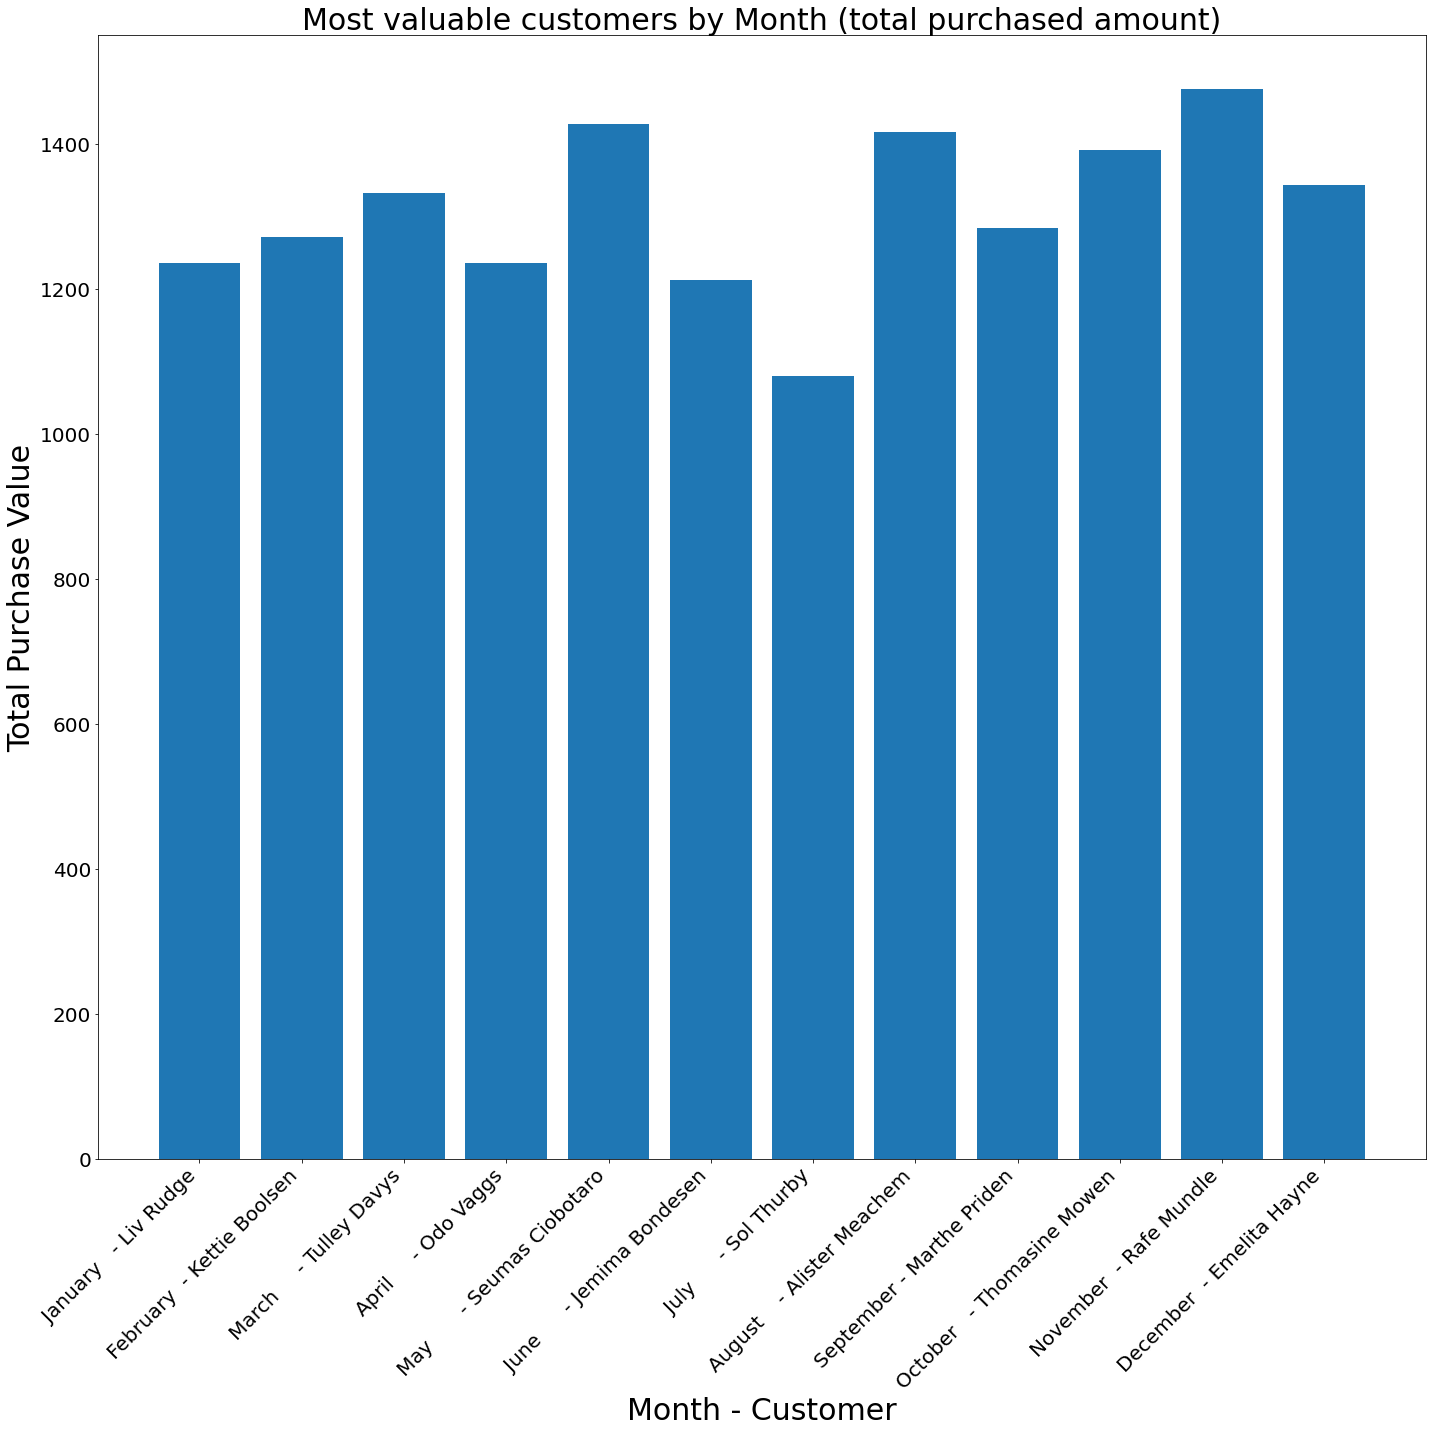

In [30]:
#Most valuable customer per month based on the total purchase amounts. 

import pandas as pd
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(20, 20))
plt.bar(top_customer_per_month['month'].astype(str) + ' - ' + top_customer_per_month['first_name'] + ' ' + top_customer_per_month['last_name'],
        top_customer_per_month['total_purchased_amount'])
plt.xlabel('Month - Customer', size=30)
plt.ylabel('Total Purchase Value', size=30)
plt.title('Most valuable customers by Month (total purchased amount)', size=30)
plt.xticks(rotation=45, ha='right', size=20)
plt.yticks(size=20)

# Show the bar chart
plt.tight_layout()
plt.show()


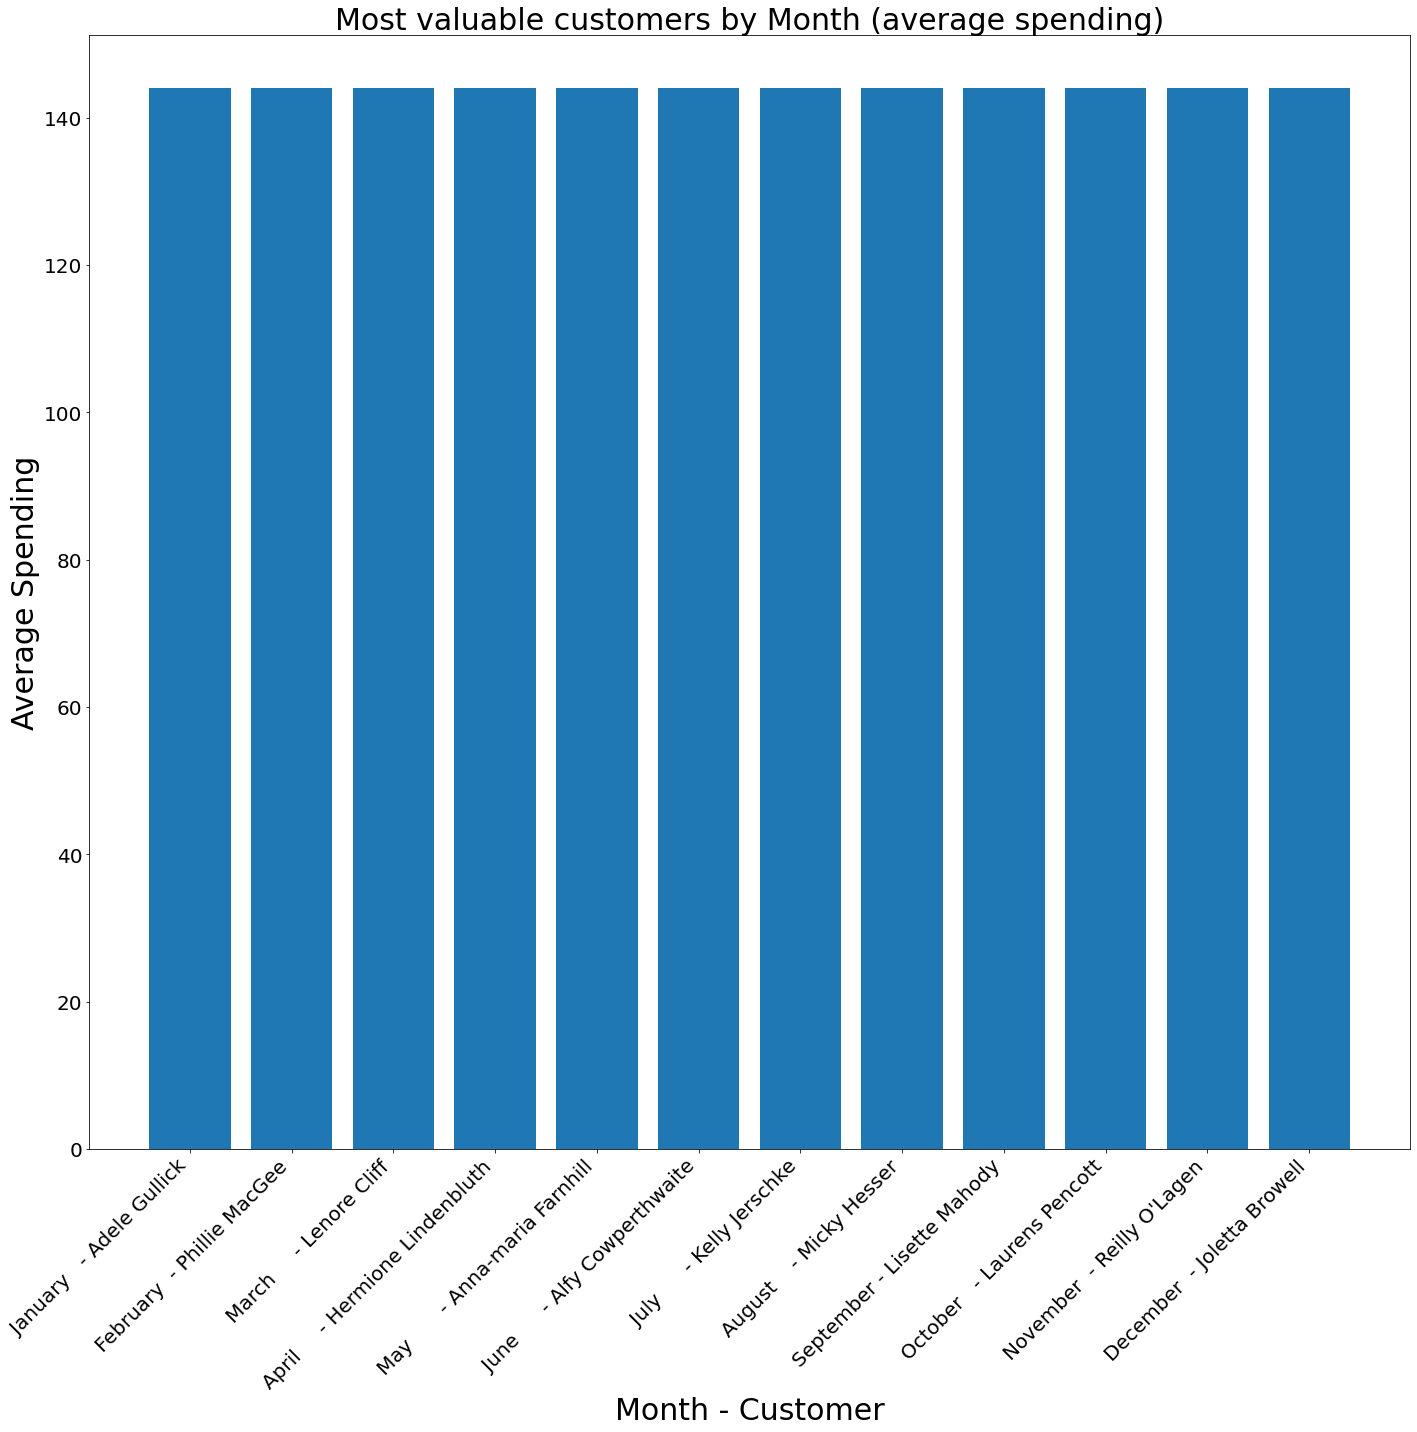

In [34]:
#Most valuable customer per month based on their average spending. 

import pandas as pd
import matplotlib.pyplot as plt

monthly_customer = df[['month_number', 'month', 'store_name', 'customer_id', 'average_spending', 'first_name', 'last_name']]

# Find the top customer per month based on total purchase amount
top_customer_per_month = monthly_customer.sort_values(by=['month_number', 'average_spending'], ascending=[True, False]) \
    .groupby('month_number').head(1)

# Create a bar chart
plt.figure(figsize=(20, 20))
plt.bar(top_customer_per_month['month'].astype(str) + ' - ' + top_customer_per_month['first_name'] + ' ' + top_customer_per_month['last_name'],
        top_customer_per_month['average_spending'])
plt.xlabel('Month - Customer', size=30)
plt.ylabel('Average Spending', size=30)
plt.title('Most valuable customers by Month (average spending)', size=30)
plt.xticks(rotation=45, ha='right', size=20)
plt.yticks(size=20)

# Show the bar chart
plt.tight_layout()
plt.show()

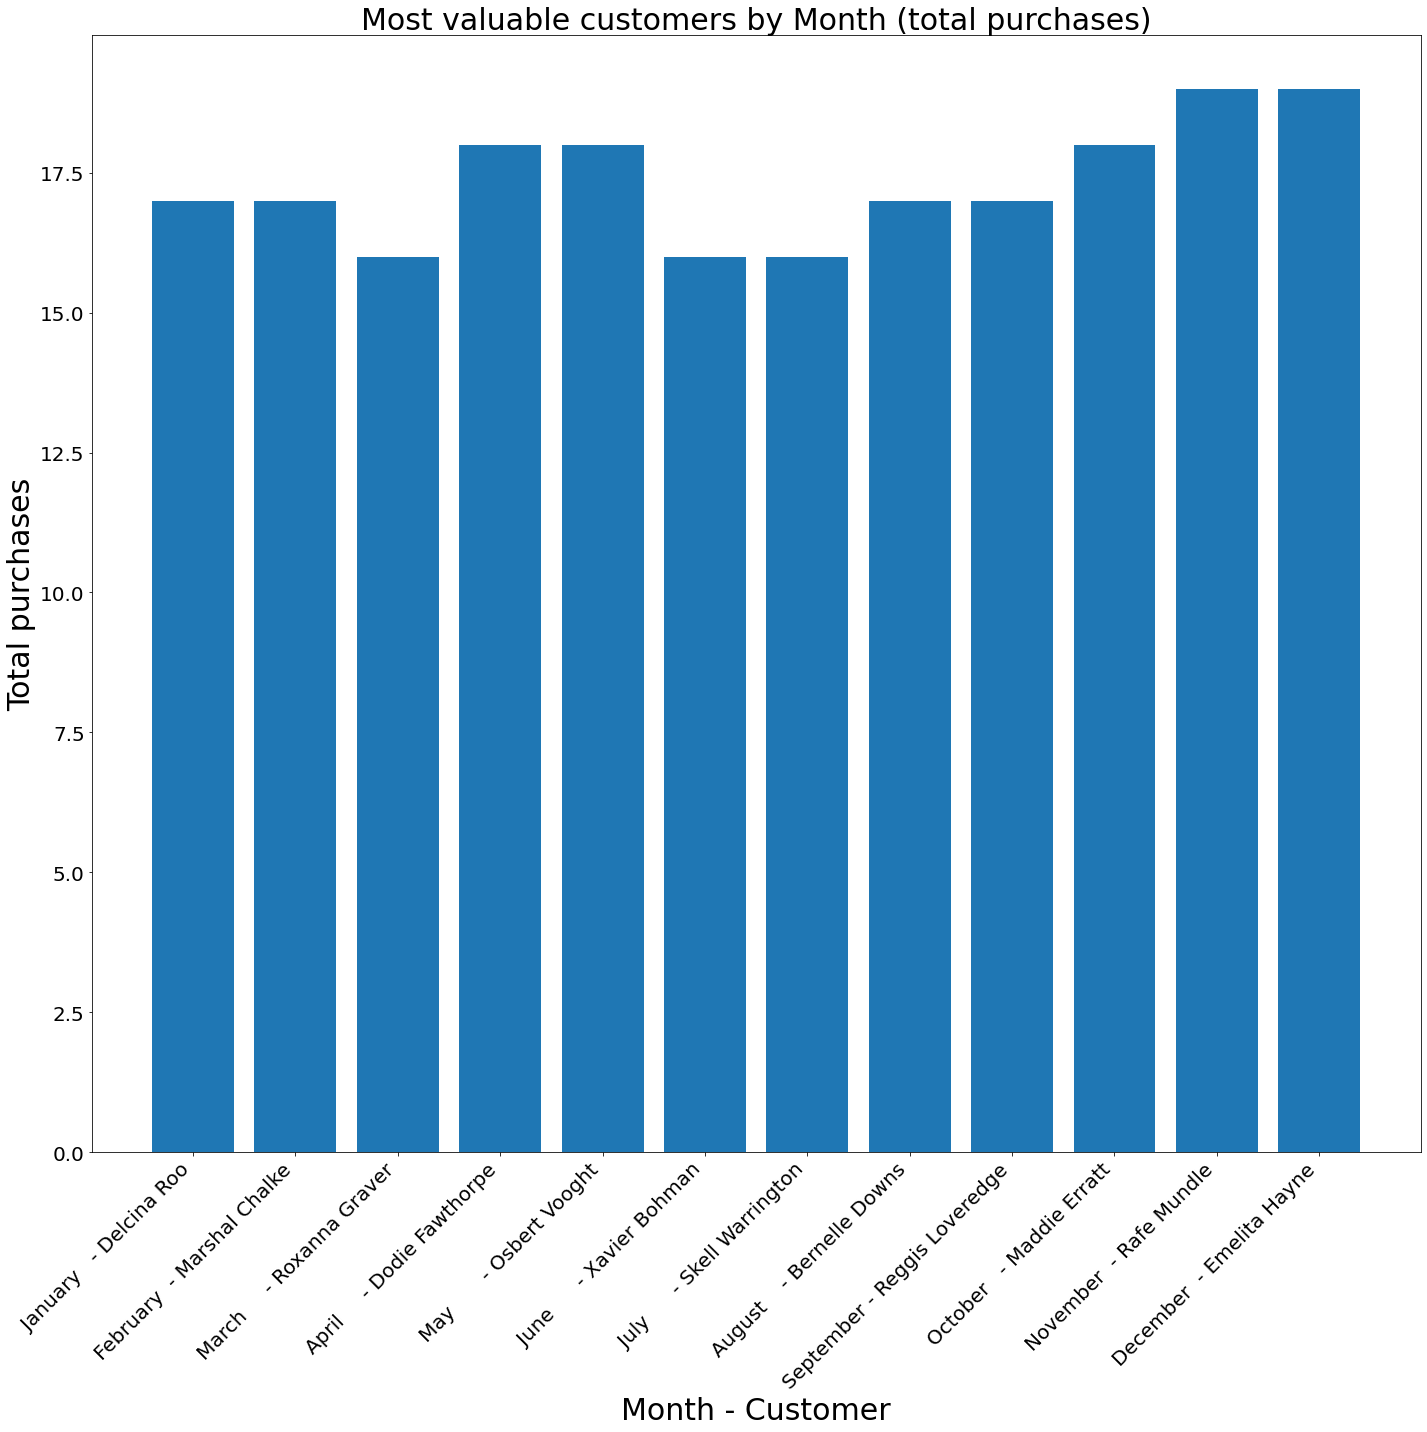

In [36]:
#Most valuable customer per month based on their purchasing frequencies. 

import pandas as pd
import matplotlib.pyplot as plt

monthly_customer = df[['month_number', 'month', 'store_name', 'customer_id', 'total_purchases', 'first_name', 'last_name']]

# Find the top customer per month based on total purchase amount
top_customer_per_month = monthly_customer.sort_values(by=['month_number', 'total_purchases'], ascending=[True, False]) \
    .groupby('month_number').head(1)

# Create a bar chart
plt.figure(figsize=(20, 20))
plt.bar(top_customer_per_month['month'].astype(str) + ' - ' + top_customer_per_month['first_name'] + ' ' + top_customer_per_month['last_name'],
        top_customer_per_month['total_purchases'])
plt.xlabel('Month - Customer', size=30)
plt.ylabel('Total purchases', size=30)
plt.title('Most valuable customers by Month (total purchases)', size=30)
plt.xticks(rotation=45, ha='right', size=20)
plt.yticks(size=20)

# Show the bar chart
plt.tight_layout()
plt.show()